In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mp
import matplotlib.pyplot as plt
from matplotlib import font_manager
from scipy.optimize import curve_fit
from matplotlib.pyplot import MultipleLocator

In [2]:
def getIndexes(y_predict, y_data):
    n = y_data.size
    # SSE为和方差
    SSE=((y_data-y_predict)**2).sum()
    # MSE为均方差
    MSE=SSE/n
    # RMSE为均方根,越接近0，拟合效果越好
    RMSE=np.sqrt(MSE)
    # 求R方，0<=R<=1，越靠近1,拟合效果越好
    u = y_data.mean()
    SST=((y_data-u)**2).sum()
    SSR=SST-SSE
    R_square=SSR/SST
    return SSE, MSE, RMSE, R_square

In [3]:
#logistic函数
def logistic_increase_function(t,K,P0,r):  
    #r=0.15
    #r = 0.55
    # t:time   t0:initial time    P0:initial_value    K:capacity  r:increase_rate
    exp_value=np.exp(r*t)
    return (K*exp_value*P0)/(K+(exp_value-1)*P0)

In [4]:
#math.sqrt(x)  #返回x的平方根
def logistic_functiona(x,a,b,c):
    return a/(1 + b*np.exp(-c*x))

In [5]:
#math.sqrt(x)  #返回x的平方根
def logistic_functionb(x,a,b,c):

    return (a*b*c*np.exp(-c*x))/(np.sqrt(1+b*np.exp(-c*x)))

In [6]:
# 读入数据集
df = pd.read_excel('D:/博士/21年玉米/2021-植株地上/灌浆/灌浆all.xlsx',sheet_name="6")
df.head()

,Treatment,播种后天数,100Dry weight,Water content,重复,100 Seed volume variation
0,T1,55,0.0,NaN,1,0.0
1,T1,55,0.0,NaN,1,0.0
2,T1,55,0.0,NaN,1,0.0
3,T1,55,0.0,NaN,1,0.0
4,T1,55,0.0,NaN,2,0.0


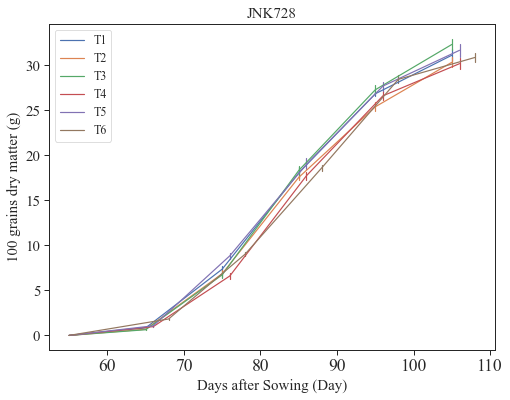

In [16]:
fig=plt.figure(figsize=(8,6))
rc = {'font.sans-serif': 'Times New Roman'}
sns.set_style("ticks",{'font.sans-serif':'Times New Roman'})
sns.set(context='paper', style='ticks', font_scale=2, rc=rc)

ax1=fig.add_subplot(111)
sns.lineplot(x= "播种后天数",
              y = "100Dry weight",hue = "Treatment",data=df,
            markers=True, dashes=False,  err_style="bars", ci=68
            )
plt.yticks(fontsize=15)# 设置x轴的刻度
plt.gcf().autofmt_xdate
plt.xlabel("Days after Sowing (Day)", fontsize=15) 
ax1.set_ylabel('100 grains dry matter (g)',fontsize=15)
plt.title('JNK728',fontsize=15)
ax1.legend(loc =0,fontsize=12)
ax1.set_ylim()

plt.savefig('D:/博士/21年玉米/图/百粒重.png',dpi=600)

In [12]:
df = pd.read_excel("D:/博士/22年玉米/灌浆/灌浆-整合.xlsx",sheet_name='作图')
df.head()

,Days,处理,100_体积,100_干重,含水量
0,10,T1,12.475695,2.246337,0.854850
1,10,T1-N,8.139175,0.984597,0.888710
2,10,T2,11.237168,1.807463,0.878502
3,10,T2-D,11.516671,1.959346,0.826761
4,10,T3,14.166667,2.378734,0.839454


In [13]:
df = df[ ~ df['处理'].str.contains('T2-D|T5-M|T1-N|T3-D')]   
df

,Days,处理,100_体积,100_干重,含水量
0,10,T1,12.475695,2.246337,0.854850
2,10,T2,11.237168,1.807463,0.878502
4,10,T3,14.166667,2.378734,0.839454
6,10,T4,11.844310,1.767003,0.862740
7,10,T5,13.045022,2.252920,0.846380
...,...,...,...,...,...
231,63,T2,38.694054,36.362741,0.202561
232,63,T3,40.336109,37.701490,0.202571
233,63,T4,38.655618,36.660010,0.193930
234,63,T5,40.062055,37.336744,0.224062


(-0.019551003619458607, 39.537054281915935)

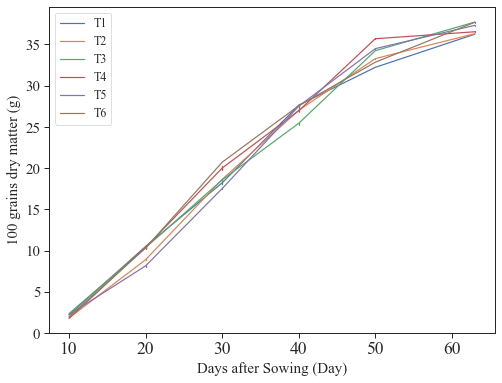

In [14]:
fig=plt.figure(figsize=(8,6))
rc = {'font.sans-serif': 'Times New Roman'}
sns.set_style("ticks",{'font.sans-serif':'Times New Roman'})
sns.set(context='paper', style='ticks', font_scale=2, rc=rc)

ax1=fig.add_subplot(111)
sns.lineplot(x= "Days",
              y = "100_干重",hue = "处理",data=df,
            markers=True, dashes=False,  err_style="bars", ci=68
            )
plt.yticks(fontsize=15)# 设置x轴的刻度
plt.gcf().autofmt_xdate
plt.xlabel("Days after Sowing (Day)", fontsize=15) 
ax1.set_ylabel('100 grains dry matter (g)',fontsize=15)
#plt.title('JNK728',fontsize=15)
ax1.legend(loc =0,fontsize=12)
ax1.set_ylim()

#plt.savefig('D:/博士/21年玉米/图/百粒重.png',dpi=600)

In [7]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
#matplotlib画图中中文显示会有问题，需要这两行设置默认字体

In [8]:
def data_model(data):
    t1= data[data["Treatment"]=="T1"]["播种后天数"].values
    t3= data[data["Treatment"]=="T2"]["播种后天数"].values
    t4= data[data["Treatment"]=="T3"]["播种后天数"].values
    t5= data[data["Treatment"]=="T4"]["播种后天数"].values
    t6= data[data["Treatment"]=="T5"]["播种后天数"].values
    t8= data[data["Treatment"]=="T6"]["播种后天数"].values
    P1 = data[data["Treatment"]=="T1"]["100Dry weight"].values
    #P2 = data[data["编号"]=="T1-N"]["100_重量"].values
    P3 = data[data["Treatment"]=="T2"]["100Dry weight"].values
    P4 = data[data["Treatment"]=="T3"]["100Dry weight"].values
    P5 = data[data["Treatment"]=="T4"]["100Dry weight"].values
    P6 = data[data["Treatment"]=="T5"]["100Dry weight"].values
    #P7 = data[data["编号"]=="T5-M"]["100_重量"].values
    P8 = data[data["Treatment"]=="T6"]["100Dry weight"].values
    #print(P8)
    popt1, pcov1 = curve_fit(logistic_increase_function, t1, P1,bounds=(0, [80, 24., 0.2]))
    #popt2, pcov2 = curve_fit(logistic_increase_function, t, P2,bounds=(0, [80, 24., 0.2]))
    popt3, pcov3 = curve_fit(logistic_increase_function, t3, P3,bounds=(0, [80, 24., 0.2]))
    popt4, pcov4 = curve_fit(logistic_increase_function, t4, P4,bounds=(0, [80, 24., 0.2]))
    popt5, pcov5 = curve_fit(logistic_increase_function, t5, P5,bounds=(0, [80, 24., 0.2]))
    popt6, pcov6 = curve_fit(logistic_increase_function, t6, P6,bounds=(0, [80, 24., 0.2]))
    #popt7, pcov7 = curve_fit(logistic_increase_function, t, P7,bounds=(0, [80, 24., 0.2]))
    popt8, pcov8 = curve_fit(logistic_increase_function, t8, P8,bounds=(0, [80, 24., 0.2]))
    #print(popt8)
    Predict1=logistic_increase_function(t1,popt1[0],popt1[1],popt1[2])
    #Predict2=logistic_increase_function(t,popt2[0],popt2[1],popt2[2])
    Predict3=logistic_increase_function(t1,popt3[0],popt3[1],popt3[2])
    Predict4=logistic_increase_function(t1,popt4[0],popt4[1],popt4[2])
    Predict5=logistic_increase_function(t1,popt5[0],popt5[1],popt5[2])
    Predict6=logistic_increase_function(t1,popt6[0],popt6[1],popt6[2])
    #Predict7=logistic_increase_function(t,popt7[0],popt7[1],popt7[2])
    Predict8=logistic_increase_function(t1,popt8[0],popt8[1],popt8[2])
    #print(Predict8)
    Evaluation_factor1 = getIndexes(Predict1,P1)
    #Evaluation_factor2 = getIndexes(Predict2,P2)
    Evaluation_factor3 = getIndexes(Predict3,P3)
    Evaluation_factor4 = getIndexes(Predict4,P4)
    Evaluation_factor5 = getIndexes(Predict5,P5)
    Evaluation_factor6 = getIndexes(Predict6,P6)
    #Evaluation_factor7 = getIndexes(Predict7,P7)
    Evaluation_factor8 = getIndexes(Predict8,P8)
   #print(Evaluation_factor8)
    label1 = "T1,R${^2}$:0.98"
    #label2 = "T1-N, K:{0:.1f}，P0:{1:.1f}，r:{2:.1f},R_square:{3:.2f}".format(popt2[0],popt2[1],popt2[2],Evaluation_factor2[3])
    label3 = "T2,R${^2}$:0.98"
    label4 = "T3,R${^2}$:0.98"
    label5 = "T4,R${^2}$:0.98"
    label6 = "T5,R${^2}$:0.97"
    #label7 = "T5-M, K:{0:.1f}，P0:{1:.1f}，r:{2:.1f},R_square:{3:.2f}".format(popt1[0],popt7[1],popt7[2],Evaluation_factor7[3])
    label8 = "T6,R${^2}$:0.96"
    
    
    #绘图
    fig=plt.figure(figsize=(10,8),dpi=200)
    
    plt.scatter(t1, P1,  c="#003f5c"  , label="T1")
    #plt.scatter(t, P2,  c="r"  , label="T1-N")
    plt.scatter(t3, P3,  c="#444e86"  , label="T2")
    plt.scatter(t4, P4,  c="#955196"  , label="T3")
    plt.scatter(t5, P5,  c="#dd5182"  , label="T4")
    plt.scatter(t6, P6,  c="#ff6e54"  , label="T5")
   # plt.scatter(t, P7,  c="b"  , label="T5-M")
    plt.scatter(t8, P8,  c="#ffa600"  , label="T6")
    
    plt.plot(t1, Predict1,c="#003f5c",linestyle='--')
    #plt.plot(t, Predict2,c="r",linestyle='--')
    plt.plot(t3, Predict3,c="#444e86",linestyle='--')
    plt.plot(t4, Predict4,c="#955196",linestyle='--')
    plt.plot(t5, Predict5,c="#dd5182",linestyle='--')
    plt.plot(t6, Predict6,c="#ff6e54",linestyle='--')
    #plt.plot(t, Predict7,c="b",linestyle='--')
    plt.plot(t8, Predict8,c="#ffa600",linestyle='--')
    
    plt.text(60, 36.5, label1 , size = 10, alpha = 1)
    #plt.text(60, 36, label2 , size = 10, alpha = 1)
    plt.text(60, 35.5, label3 , size = 10, alpha = 1)
    plt.text(60, 34.5, label4 , size = 10, alpha = 1) 
    plt.text(60, 33.5, label5 , size = 10, alpha = 1)
    plt.text(60, 32.5, label6 , size = 10, alpha = 1)
   # plt.text(60, 29, label7 , size = 10, alpha = 1)
    plt.text(60, 31.5, label8 , size = 10, alpha = 1) 
    
    
    plt.gcf().autofmt_xdate
    plt.legend(loc=0)
    plt.xlabel('Days after Sowing(day)')
    plt.ylabel('100 Dry weight of seeds(g)')
    print(popt1,popt3,popt4,popt5,popt6,popt8)
    plt.savefig("D:/博士/21年玉米/2021-植株地上/灌浆-图/籽粒干重.png")

[3.18562830e+01 8.59917475e-05 1.53803620e-01] [3.08825173e+01 9.04419574e-05 1.52414879e-01] [3.29382780e+01 6.10053566e-05 1.57322572e-01] [3.08035095e+01 3.33838162e-05 1.63092589e-01] [3.24724402e+01 1.41639040e-04 1.47710575e-01] [3.22199920e+01 1.29667939e-04 1.45631831e-01]


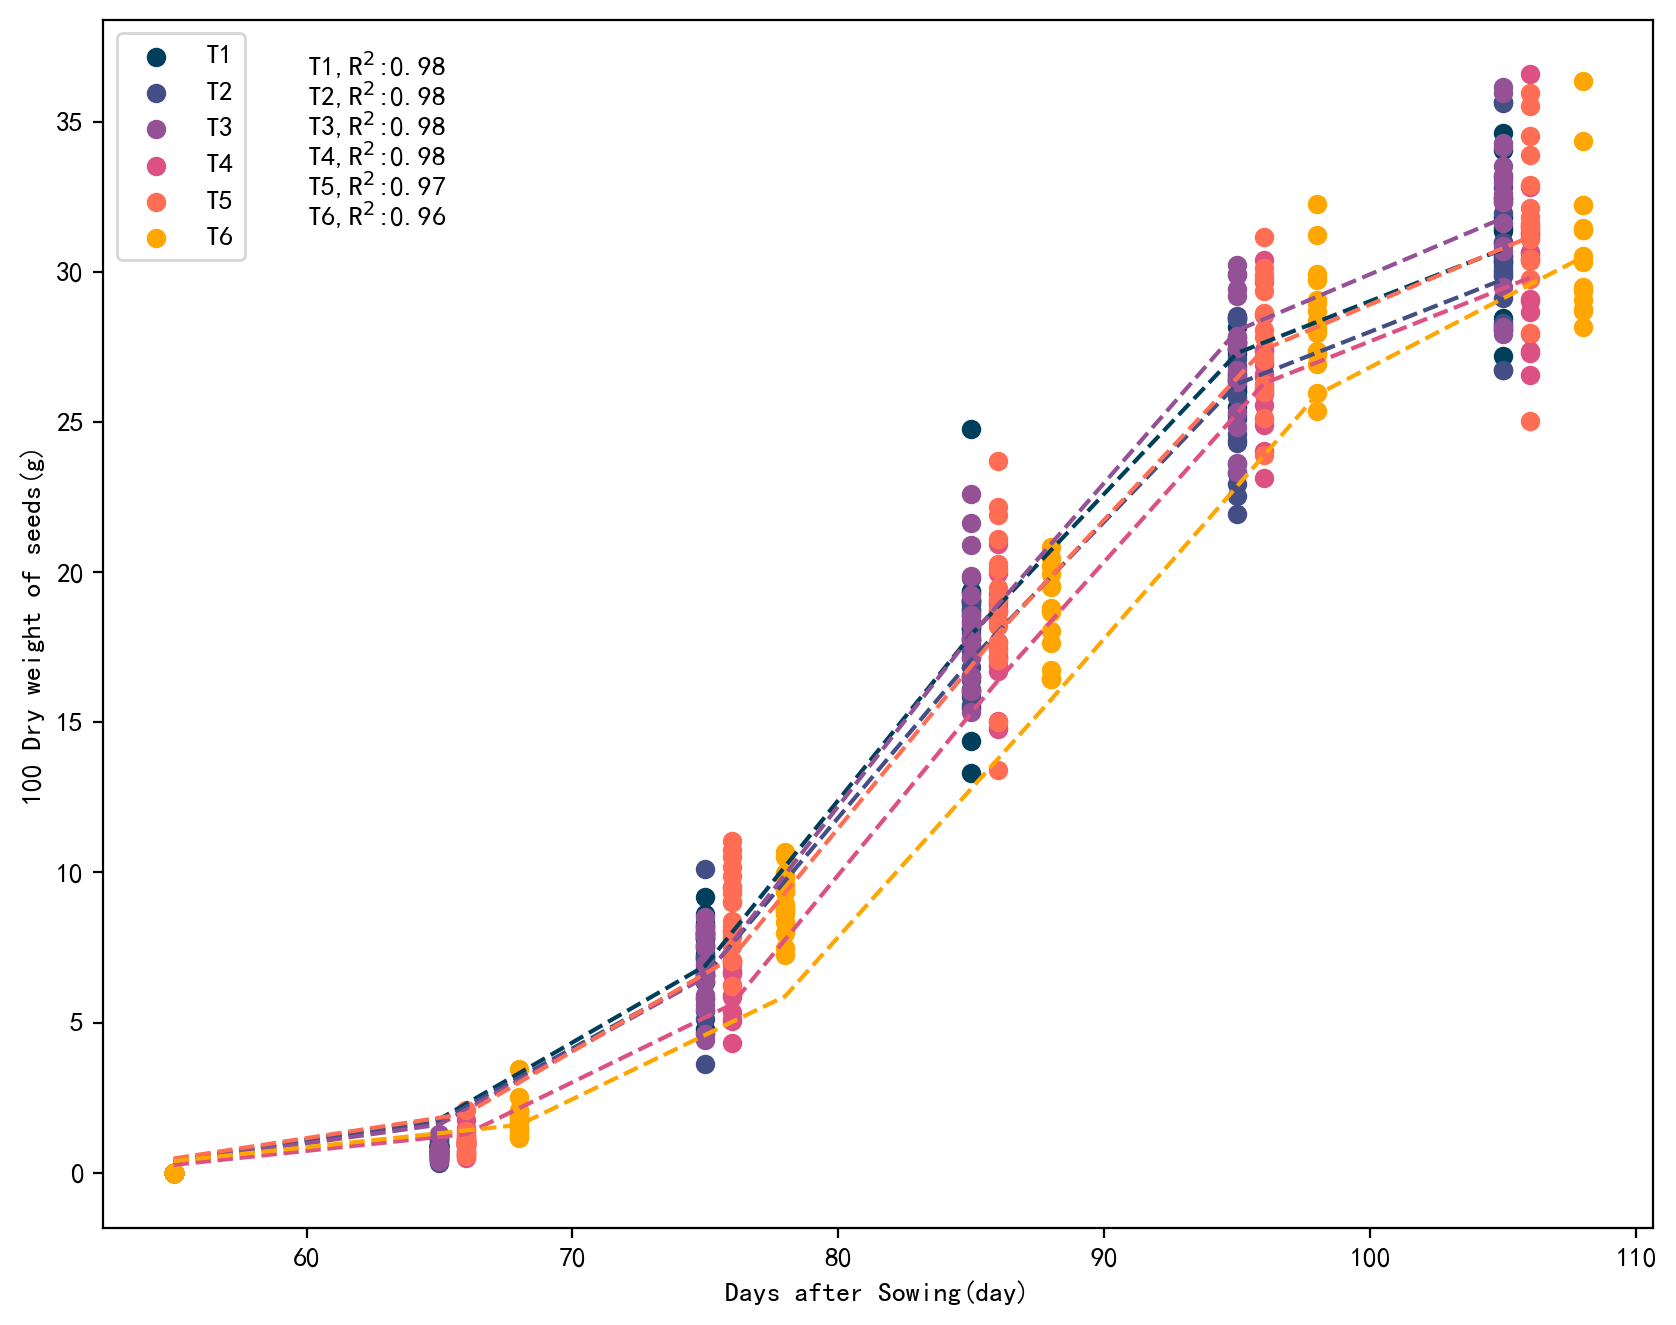

In [264]:
data_model(df)

In [265]:
def data_model(data):
    t1= data[data["Treatment"]=="T1"]["播种后天数"].values
    t3= data[data["Treatment"]=="T2"]["播种后天数"].values
    t4= data[data["Treatment"]=="T3"]["播种后天数"].values
    t5= data[data["Treatment"]=="T4"]["播种后天数"].values
    t6= data[data["Treatment"]=="T5"]["播种后天数"].values
    t8= data[data["Treatment"]=="T6"]["播种后天数"].values
    P1 = data[data["Treatment"]=="T1"]["100 Seed volume variation"].values
    #P2 = data[data["编号"]=="T1-N"]["100_重量"].values
    P3 = data[data["Treatment"]=="T2"]["100 Seed volume variation"].values
    P4 = data[data["Treatment"]=="T3"]["100 Seed volume variation"].values
    P5 = data[data["Treatment"]=="T4"]["100 Seed volume variation"].values
    P6 = data[data["Treatment"]=="T5"]["100 Seed volume variation"].values
    #P7 = data[data["编号"]=="T5-M"]["100_重量"].values
    P8 = data[data["Treatment"]=="T6"]["100 Seed volume variation"].values
    #print(P8)
    popt1, pcov1 = curve_fit(logistic_increase_function, t1, P1,bounds=(0, [80, 24., 0.2]))
    #popt2, pcov2 = curve_fit(logistic_increase_function, t, P2,bounds=(0, [80, 24., 0.2]))
    popt3, pcov3 = curve_fit(logistic_increase_function, t3, P3,bounds=(0, [80, 24., 0.2]))
    popt4, pcov4 = curve_fit(logistic_increase_function, t4, P4,bounds=(0, [80, 24., 0.2]))
    popt5, pcov5 = curve_fit(logistic_increase_function, t5, P5,bounds=(0, [80, 24., 0.2]))
    popt6, pcov6 = curve_fit(logistic_increase_function, t6, P6,bounds=(0, [80, 24., 0.2]))
    #popt7, pcov7 = curve_fit(logistic_increase_function, t, P7,bounds=(0, [80, 24., 0.2]))
    popt8, pcov8 = curve_fit(logistic_increase_function, t8, P8,bounds=(0, [80, 24., 0.2]))
    #print(popt8)
    Predict1=logistic_increase_function(t1,popt1[0],popt1[1],popt1[2])
    #Predict2=logistic_increase_function(t,popt2[0],popt2[1],popt2[2])
    Predict3=logistic_increase_function(t1,popt3[0],popt3[1],popt3[2])
    Predict4=logistic_increase_function(t1,popt4[0],popt4[1],popt4[2])
    Predict5=logistic_increase_function(t1,popt5[0],popt5[1],popt5[2])
    Predict6=logistic_increase_function(t1,popt6[0],popt6[1],popt6[2])
    #Predict7=logistic_increase_function(t,popt7[0],popt7[1],popt7[2])
    Predict8=logistic_increase_function(t1,popt8[0],popt8[1],popt8[2])
    #print(Predict8)
    Evaluation_factor1 = getIndexes(Predict1,P1)
    #Evaluation_factor2 = getIndexes(Predict2,P2)
    Evaluation_factor3 = getIndexes(Predict3,P3)
    Evaluation_factor4 = getIndexes(Predict4,P4)
    Evaluation_factor5 = getIndexes(Predict5,P5)
    Evaluation_factor6 = getIndexes(Predict6,P6)
    #Evaluation_factor7 = getIndexes(Predict7,P7)
    Evaluation_factor8 = getIndexes(Predict8,P8)
   #print(Evaluation_factor8)
    label1 = "T1,R${^2}$:0.98"
    #label2 = "T1-N, K:{0:.1f}，P0:{1:.1f}，r:{2:.1f},R_square:{3:.2f}".format(popt2[0],popt2[1],popt2[2],Evaluation_factor2[3])
    label3 = "T2,R${^2}$:0.98"
    label4 = "T3,R${^2}$:0.98"
    label5 = "T4,R${^2}$:0.98"
    label6 = "T5,R${^2}$:0.97"
    #label7 = "T5-M, K:{0:.1f}，P0:{1:.1f}，r:{2:.1f},R_square:{3:.2f}".format(popt1[0],popt7[1],popt7[2],Evaluation_factor7[3])
    label8 = "T6,R${^2}$:0.96"
    
    
    #绘图
    fig=plt.figure(figsize=(10,8),dpi=200)
    
    plt.scatter(t1, P1,  c="#003f5c"  , label="T1")
    #plt.scatter(t, P2,  c="r"  , label="T1-N")
    plt.scatter(t3, P3,  c="#444e86"  , label="T2")
    plt.scatter(t4, P4,  c="#955196"  , label="T3")
    plt.scatter(t5, P5,  c="#dd5182"  , label="T4")
    plt.scatter(t6, P6,  c="#ff6e54"  , label="T5")
   # plt.scatter(t, P7,  c="b"  , label="T5-M")
    plt.scatter(t8, P8,  c="#ffa600"  , label="T6")
    
    plt.plot(t1, Predict1,c="#003f5c",linestyle='--')
    #plt.plot(t, Predict2,c="r",linestyle='--')
    plt.plot(t3, Predict3,c="#444e86",linestyle='--')
    plt.plot(t4, Predict4,c="#955196",linestyle='--')
    plt.plot(t5, Predict5,c="#dd5182",linestyle='--')
    plt.plot(t6, Predict6,c="#ff6e54",linestyle='--')
    #plt.plot(t, Predict7,c="b",linestyle='--')
    plt.plot(t8, Predict8,c="#ffa600",linestyle='--')
    
    plt.text(60, 52, label1 , size = 10, alpha = 1)
    #plt.text(60, 36, label2 , size = 10, alpha = 1)
    plt.text(60, 51, label3 , size = 10, alpha = 1)
    plt.text(60, 50, label4 , size = 10, alpha = 1) 
    plt.text(60, 49, label5 , size = 10, alpha = 1)
    plt.text(60, 48, label6 , size = 10, alpha = 1)
   # plt.text(60, 29, label7 , size = 10, alpha = 1)
    plt.text(60, 47, label8 , size = 10, alpha = 1) 
    
    
    plt.gcf().autofmt_xdate
    plt.legend(loc=0)
    plt.xlabel('Days after Sowing(day)')
    plt.ylabel('100 Seed volume variation(ml)')
    
    print(popt1,popt3,popt4,popt5,popt6,popt8)
    plt.savefig("D:/博士/21年玉米/2021-植株地上/灌浆-图/籽粒tiji.png")

[4.20940975e+01 2.02999163e-04 1.64736076e-01] [4.02379067e+01 2.56956685e-04 1.59386364e-01] [4.38237201e+01 1.58245129e-04 1.65465829e-01] [4.22510776e+01 7.69126338e-04 1.44096946e-01] [4.32226088e+01 3.68766781e-04 1.57463438e-01] [4.37616730e+01 2.23207124e-03 1.29870241e-01]


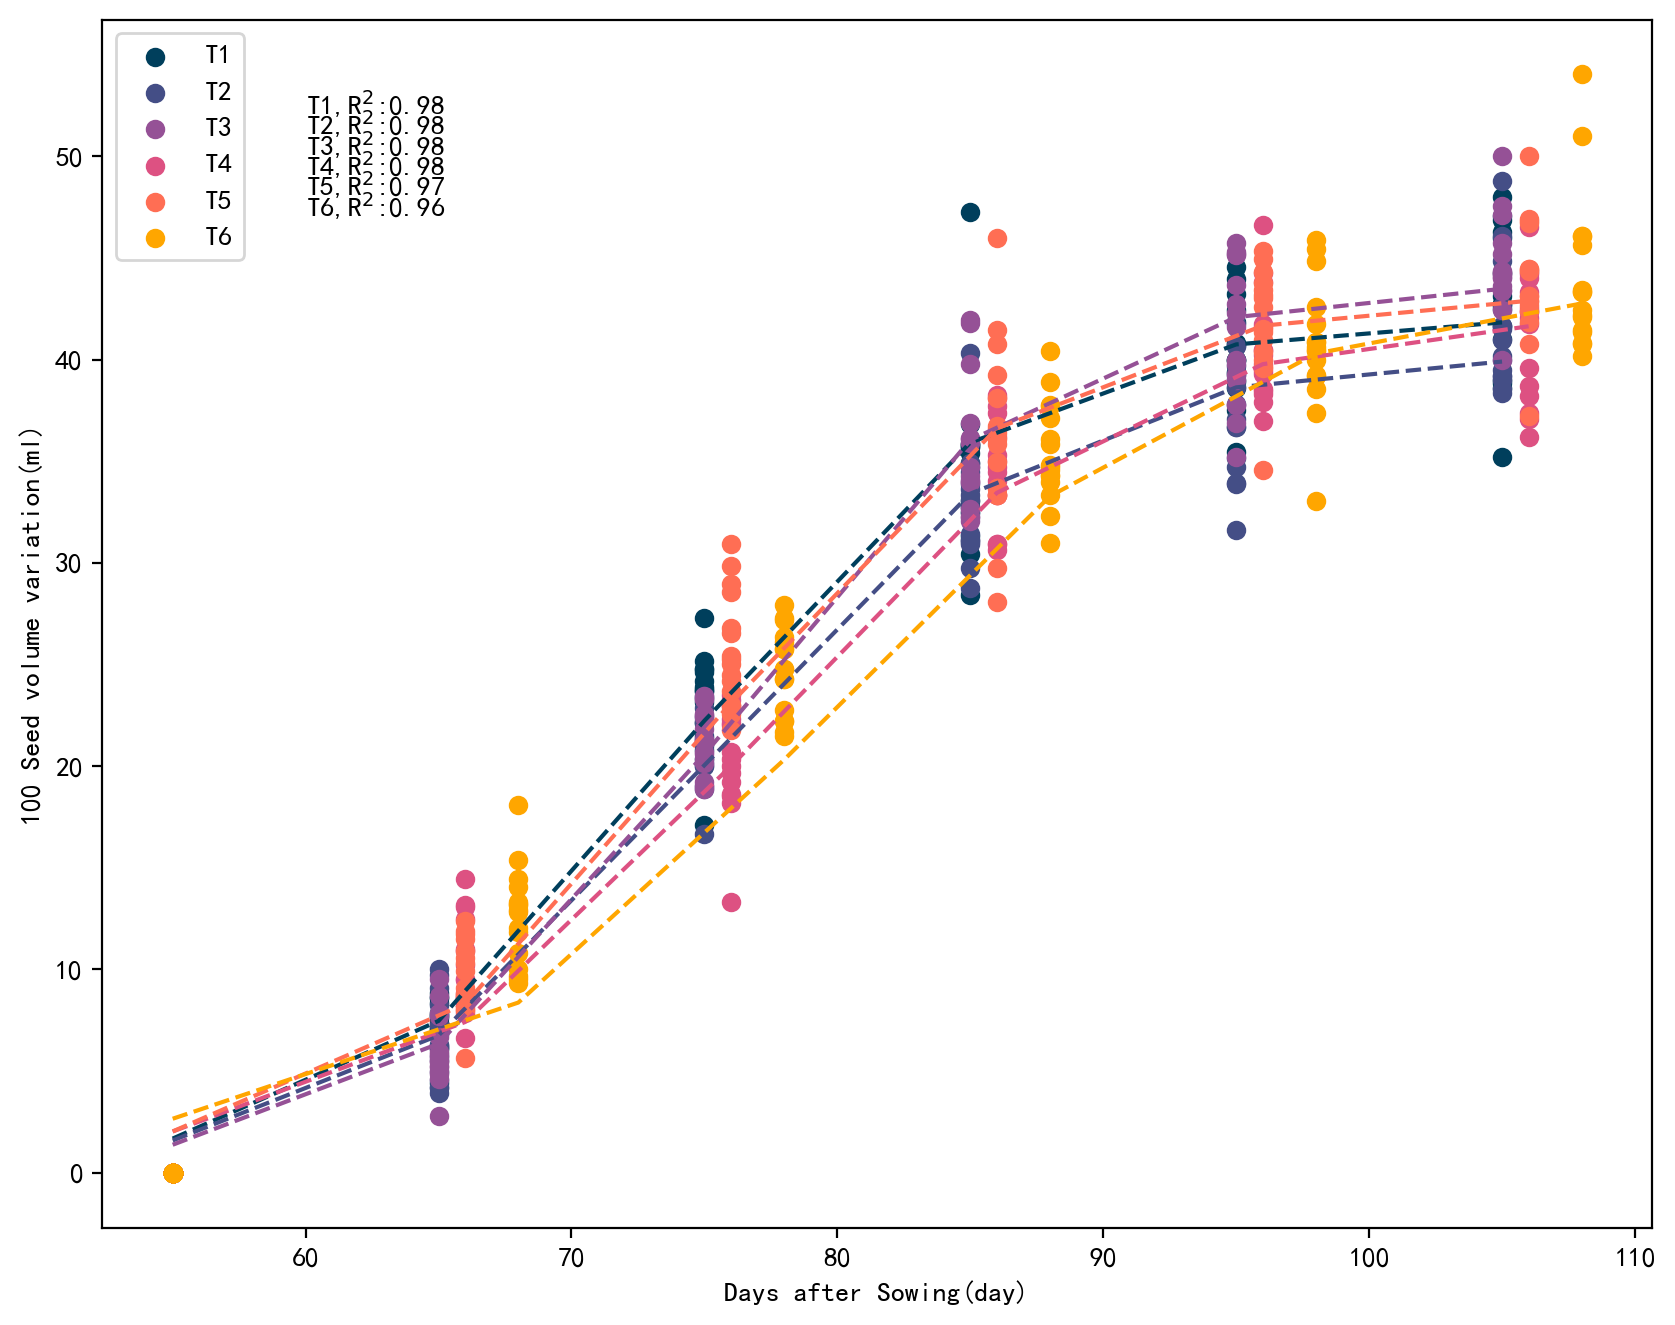

In [266]:
data_model(df)

In [27]:
df = pd.read_excel('D:/博士/21年玉米/2021-植株地上/灌浆/灌浆all.xlsx',sheet_name="3")
df.head()

,Treatment,播种后天数,Unnamed: 2,Water content,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,T1,65.0,0.885098,88.509752,NaN,NaN,NaN,NaN,NaN,NaN
1,T1,65.0,0.885161,88.516065,NaN,NaN,NaN,NaN,NaN,NaN
2,T1,65.0,0.861081,86.108063,NaN,NaN,NaN,NaN,NaN,NaN
3,T1,65.0,0.888932,88.893190,NaN,NaN,NaN,NaN,NaN,NaN
4,T1,65.0,0.877100,87.710047,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
def logistic_increase_function(x,a,b):

    return a*x + b

In [29]:
def data_model(data):
    t1= data[data["Treatment"]=="T1"]["播种后天数"].values
    t3= data[data["Treatment"]=="T2"]["播种后天数"].values
    t4= data[data["Treatment"]=="T3"]["播种后天数"].values
    t5= data[data["Treatment"]=="T4"]["播种后天数"].values
    t6= data[data["Treatment"]=="T5"]["播种后天数"].values
    t8= data[data["Treatment"]=="T6"]["播种后天数"].values
    P1 = data[data["Treatment"]=="T1"]["Water content"].values
    #P2 = data[data["编号"]=="T1-N"]["100_重量"].values
    P3 = data[data["Treatment"]=="T2"]["Water content"].values
    P4 = data[data["Treatment"]=="T3"]["Water content"].values
    P5 = data[data["Treatment"]=="T4"]["Water content"].values
    P6 = data[data["Treatment"]=="T5"]["Water content"].values
    #P7 = data[data["编号"]=="T5-M"]["100_重量"].values
    P8 = data[data["Treatment"]=="T6"]["Water content"].values
    #print(P8)
    popt1, pcov1 = curve_fit(logistic_increase_function, t1, P1)
    #popt2, pcov2 = curve_fit(logistic_increase_function, t, P2,bounds=(0, [80, 24., 0.2]))
    popt3, pcov3 = curve_fit(logistic_increase_function, t3, P3)
    popt4, pcov4 = curve_fit(logistic_increase_function, t4, P4)
    popt5, pcov5 = curve_fit(logistic_increase_function, t5, P5)
    popt6, pcov6 = curve_fit(logistic_increase_function, t6, P6)
    #popt7, pcov7 = curve_fit(logistic_increase_function, t, P7)
    popt8, pcov8 = curve_fit(logistic_increase_function, t8, P8)
    #print(popt8)
    Predict1=logistic_increase_function(t1,popt1[0],popt1[1])
    #Predict2=logistic_increase_function(t,popt2[0],popt2[1],popt2[2])
    Predict3=logistic_increase_function(t1,popt3[0],popt3[1])
    Predict4=logistic_increase_function(t1,popt4[0],popt4[1])
    Predict5=logistic_increase_function(t1,popt5[0],popt5[1])
    Predict6=logistic_increase_function(t1,popt6[0],popt6[1])
    #Predict7=logistic_increase_function(t,popt7[0],popt7[1])
    Predict8=logistic_increase_function(t1,popt8[0],popt8[1])
    #print(Predict8)
    Evaluation_factor1 = getIndexes(Predict1,P1)
    #Evaluation_factor2 = getIndexes(Predict2,P2)
    Evaluation_factor3 = getIndexes(Predict3,P3)
    Evaluation_factor4 = getIndexes(Predict4,P4)
    Evaluation_factor5 = getIndexes(Predict5,P5)
    Evaluation_factor6 = getIndexes(Predict6,P6)
    #Evaluation_factor7 = getIndexes(Predict7,P7)
    Evaluation_factor8 = getIndexes(Predict8,P8)
   #print(Evaluation_factor8)
    label1 = "T1,R_square:{0:.2f}".format(Evaluation_factor1[3])
    #label2 = "T1-N, K:{0:.1f}，P0:{1:.1f}，r:{2:.1f},R_square:{3:.2f}".format(popt2[0],popt2[1],popt2[2],Evaluation_factor2[3])
    label3 = "T2,R_square:{0:.2f}".format(Evaluation_factor3[3])
    label4 = "T3,R_square:{0:.2f}".format(Evaluation_factor4[3])
    label5 = "T4,R_square:{0:.2f}".format(Evaluation_factor5[3])
    label6 = "T5,R_square:{0:.2f}".format(Evaluation_factor6[3])
    #label7 = "T5-M, K:{0:.1f}，P0:{1:.1f}，r:{2:.1f},R_square:{3:.2f}".format(popt1[0],popt7[1],popt7[2],Evaluation_factor7[3])
    label8 = "T6,R_square:{0:.2f}".format(Evaluation_factor8[3])
    
    
    #绘图
    fig=plt.figure(figsize=(10,8),dpi=200)
    
    plt.scatter(t1, P1,  c="#003f5c"  , label="T1")
    #plt.scatter(t, P2,  c="r"  , label="T1-N")
    plt.scatter(t3, P3,  c="#444e86"  , label="T2")
    plt.scatter(t4, P4,  c="#955196"  , label="T3")
    plt.scatter(t5, P5,  c="#dd5182"  , label="T4")
    plt.scatter(t6, P6,  c="#ff6e54"  , label="T5")
   # plt.scatter(t, P7,  c="b"  , label="T5-M")
    plt.scatter(t8, P8,  c="#ffa600"  , label="T6")
    
    #plt.plot(t1, Predict1,c="#003f5c",linestyle='--')
    #plt.plot(t, Predict2,c="r",linestyle='--')
    #plt.plot(t3, Predict3,c="#444e86",linestyle='--')
   # plt.plot(t4, Predict4,c="#955196",linestyle='--')
    #plt.plot(t5, Predict5,c="#dd5182",linestyle='--')
    #plt.plot(t6, Predict6,c="#ff6e54",linestyle='--')
    #plt.plot(t, Predict7,c="b",linestyle='--')
   # plt.plot(t8, Predict8,c="#ffa600",linestyle='--')
    
    #plt.text(101, 80, label1 , size = 10, alpha = 1)
    #plt.text(60, 36, label2 , size = 10, alpha = 1)
    #plt.text(101, 78, label3 , size = 10, alpha = 1)
    #plt.text(101, 76, label4 , size = 10, alpha = 1) 
    #plt.text(101, 74, label5 , size = 10, alpha = 1)
   #plt.text(101, 72, label6 , size = 10, alpha = 1)
   # plt.text(60, 29, label7 , size = 10, alpha = 1)
    #plt.text(101, 70, label8 , size = 10, alpha = 1) 
    

    
    plt.gcf().autofmt_xdate
    plt.legend(loc=1)
    plt.xlabel('Days after Sowing(day)')
    plt.ylabel('Seed Dehydration(%)')
    
    print(popt1,popt3,popt4,popt5,popt6,popt8)
    plt.savefig("D:/博士/21年玉米/2021-植株地上/灌浆-图/籽粒含水量.png")

[ -1.26720646 166.90468441] [ -1.25508427 166.07818331] [ -1.24855321 165.70249038] [ -1.20317232 163.28202122] [ -1.20444525 162.54512706] [ -1.17107294 161.45415943]


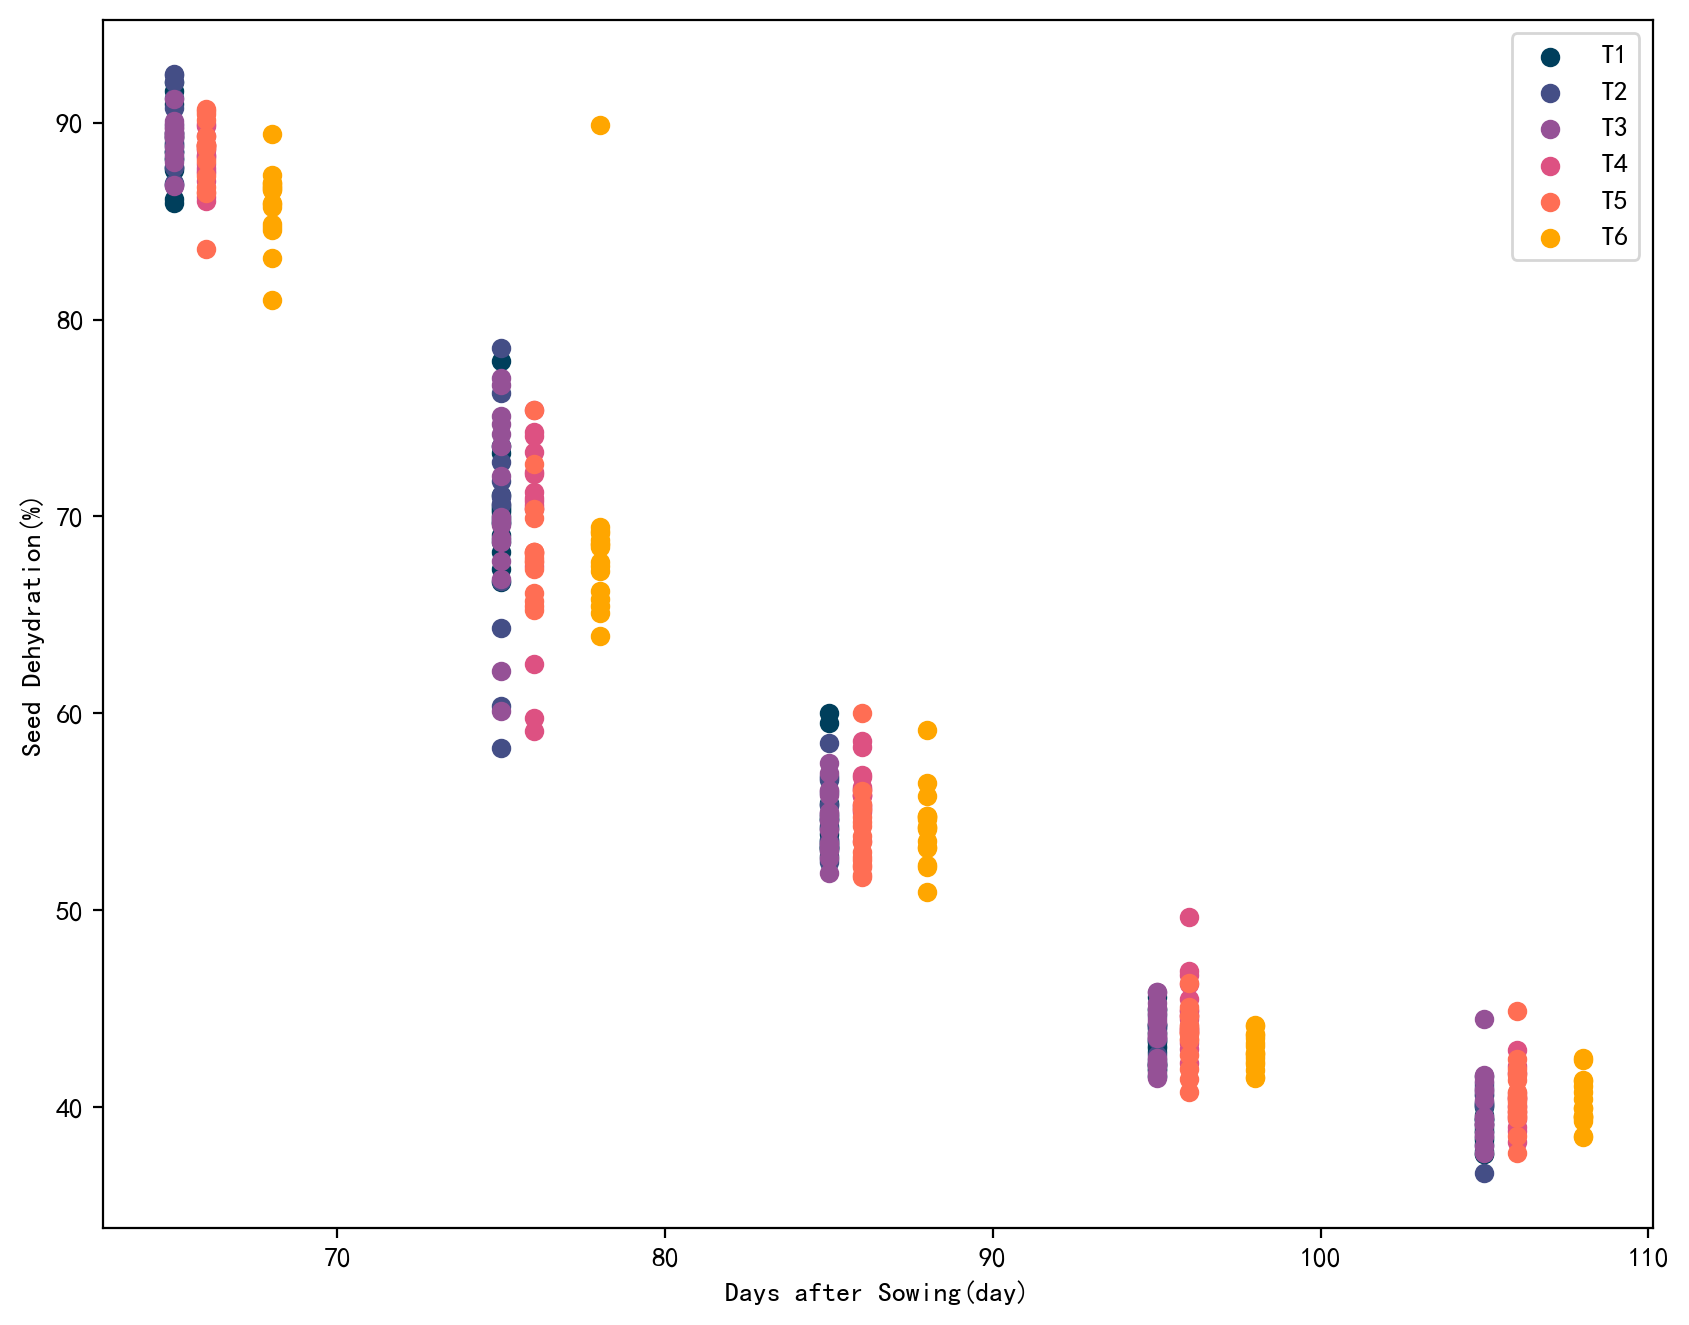

In [30]:
data_model(df)